In [15]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [16]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

# START

## LINKS
[ALL STATS](#ALL-STATS)

[LONGS](#LONGS)

[SHORTS](#SHORTS)


In [22]:
def summarize_stats(file, distance_points, sort_by='kelly_adj_return'):
    distance_pairs = [*zip(distance_points, distance_points[1:])]
    distance_keys = [f'{x[0]} -> {x[1]}' for x in distance_pairs]

    stats = pandas.read_pickle(f"../output_bucketed/{file}.pickle")
    stats = stats[stats['total_return_r'] > 0]
    stats = stats.sort_values(by=sort_by, ascending=False)

    # Picky downselect
    stats = stats[(stats['profit_factor'] > 2.2) & (stats['target_r'] <= 5) & (stats['target_r'] >= 0.5)]

    print()
    for distance_key in distance_keys:
        print(distance_key)
        display(stats[stats['distance_key'] == distance_key].head(40))
        print()
        print()
        print()





    r = []
    for distance_key in distance_keys:
        x = stats[stats['distance_key'] == distance_key]
        if x.empty:
            r.append({
                'av_dist': -1,
                'distance_key': distance_key,
                'buffer': -1,
                'stop': -1,
                'target': -1,
                'target_r': -1,
                'win_rate': -1,
                'profit_factor': -1,
                'total_return_r': 0,
                'kelly_adj_return': 0,
                'hit_count': 0
            })
            continue
        xx = x.iloc[0]
        r.append({
            'av_dist': (xx['distance_min'] + xx['distance_max'])/2,
            'distance_key': xx['distance_key'],
            'buffer': xx['buffer'],
            'stop': xx['stop'],
            'target': xx['target'],
            'target_r': xx['target_r'],
            'win_rate': xx['win_rate'],
            'profit_factor': xx['profit_factor'],
            'total_return_r': xx['total_return_r'],
            'kelly_adj_return': xx['kelly_adj_return'],
            'hit_count': xx['hit_count']
        })
    rr = pandas.DataFrame(r)

    display(rr.head(50))


    print()
    kelly_adj_return_sum = rr['kelly_adj_return'].sum()
    total_return_r_sum = rr['total_return_r'].sum()
    hit_count_sum = rr['hit_count'].sum()

    print('SUMMARY OF TOTALS:')
    print(f'kelly_adj_return_sum {kelly_adj_return_sum}')
    print(f'total_return_r_sum {total_return_r_sum}')
    print(f'hit_count_sum {hit_count_sum}')
    print()

    display(rr.plot.scatter(x='av_dist', y='buffer', s=10))
    display(rr.plot.scatter(x='av_dist', y='stop', s=10))
    display(rr.plot.scatter(x='av_dist', y='target', s=10))


# LONGS
[< -- START](#START)


0 -> 0.5


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
91,0 -> 0.5,0.0,0.5,1.0,0.0,0.4,1.5,3.750,3.750,0.0,3,66.667,6.50,7.500,0.578,3.756
90,0 -> 0.5,0.0,0.5,1.0,0.0,0.4,1.4,3.500,3.500,0.0,3,66.667,6.00,7.000,0.571,3.429
2190,0 -> 0.5,0.0,0.5,1.1,0.0,0.4,0.8,2.000,2.000,0.0,4,75.000,5.00,6.000,0.625,3.125
89,0 -> 0.5,0.0,0.5,1.0,0.0,0.4,1.3,3.250,3.250,0.0,3,66.667,5.50,6.500,0.564,3.103
25351,0 -> 0.5,0.0,0.5,2.2,0.0,0.4,0.3,0.750,0.750,0.0,8,87.500,4.25,5.250,0.708,3.010
44305,0 -> 0.5,0.0,0.5,3.1,0.0,0.4,0.3,0.750,0.750,0.0,8,87.500,4.25,5.250,0.708,3.010
23245,0 -> 0.5,0.0,0.5,2.1,0.0,0.4,0.3,0.750,0.750,0.0,8,87.500,4.25,5.250,0.708,3.010
29563,0 -> 0.5,0.0,0.5,2.4,0.0,0.4,0.3,0.750,0.750,0.0,8,87.500,4.25,5.250,0.708,3.010
27457,0 -> 0.5,0.0,0.5,2.3,0.0,0.4,0.3,0.750,0.750,0.0,8,87.500,4.25,5.250,0.708,3.010
35881,0 -> 0.5,0.0,0.5,2.7,0.0,0.4,0.3,0.750,0.750,0.0,8,87.500,4.25,5.250,0.708,3.010





0.5 -> 1.25


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
66066,0.5 -> 1.25,0.5,1.25,1.0,0.2,0.4,0.2,0.500,0.500,0.0,30,86.667,9.00,3.250,0.600,5.400
66226,0.5 -> 1.25,0.5,1.25,1.0,0.2,0.8,0.6,0.750,0.737,0.0,30,76.667,10.13,2.423,0.450,4.561
118716,0.5 -> 1.25,0.5,1.25,3.5,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
127140,0.5 -> 1.25,0.5,1.25,3.9,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
129246,0.5 -> 1.25,0.5,1.25,4.0,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
116610,0.5 -> 1.25,0.5,1.25,3.4,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
114504,0.5 -> 1.25,0.5,1.25,3.3,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
112398,0.5 -> 1.25,0.5,1.25,3.2,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
122928,0.5 -> 1.25,0.5,1.25,3.7,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545
120822,0.5 -> 1.25,0.5,1.25,3.6,0.2,0.4,0.2,0.500,0.500,0.0,44,81.818,10.00,2.250,0.455,4.545





1.25 -> 2.0


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
132445,1.25 -> 2.0,1.25,2.0,1.0,0.5,0.5,0.3,0.600,0.600,0.000,13,92.308,6.20,7.200,0.795,4.928
133023,1.25 -> 2.0,1.25,2.0,1.1,0.0,1.0,3.5,3.500,3.157,17.241,29,41.379,19.21,2.228,0.228,4.382
130906,1.25 -> 2.0,1.25,2.0,1.0,0.0,1.0,2.4,2.400,2.160,17.391,23,52.174,14.36,2.356,0.300,4.312
130910,1.25 -> 2.0,1.25,2.0,1.0,0.0,1.0,2.8,2.800,2.643,21.739,23,47.826,15.12,2.422,0.281,4.246
130579,1.25 -> 2.0,1.25,2.0,1.0,0.0,0.2,0.9,4.500,4.485,0.000,23,34.783,20.95,2.392,0.202,4.241
130927,1.25 -> 2.0,1.25,2.0,1.0,0.1,0.2,0.6,3.000,2.973,0.000,20,45.000,15.90,2.432,0.265,4.214
130575,1.25 -> 2.0,1.25,2.0,1.0,0.0,0.2,0.5,2.500,2.490,0.000,23,47.826,15.45,2.282,0.269,4.151
131320,1.25 -> 2.0,1.25,2.0,1.0,0.2,0.3,0.9,3.000,2.933,0.000,20,45.000,15.75,2.400,0.262,4.134
130917,1.25 -> 2.0,1.25,2.0,1.0,0.0,1.0,3.5,3.500,3.110,21.739,23,43.478,16.21,2.393,0.253,4.102
130909,1.25 -> 2.0,1.25,2.0,1.0,0.0,1.0,2.7,2.700,2.561,21.739,23,47.826,14.32,2.347,0.274,3.931





2.0 -> 10


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
199420,2.0 -> 10,2.0,10.0,1.1,0.4,0.3,1.5,5.000,4.858,0.0,25,52.000,52.65,5.263,0.421,22.176
199770,2.0 -> 10,2.0,10.0,1.1,0.5,0.3,1.4,4.667,4.596,0.0,22,54.545,45.88,5.516,0.447,20.488
199419,2.0 -> 10,2.0,10.0,1.1,0.4,0.3,1.4,4.667,4.538,0.0,25,52.000,48.36,4.916,0.414,20.032
201526,2.0 -> 10,2.0,10.0,1.2,0.4,0.3,1.5,5.000,4.868,0.0,27,48.148,50.62,4.520,0.375,18.981
201876,2.0 -> 10,2.0,10.0,1.2,0.5,0.3,1.4,4.667,4.603,0.0,23,52.174,44.88,5.022,0.418,18.753
203982,2.0 -> 10,2.0,10.0,1.3,0.5,0.3,1.4,4.667,4.613,0.0,26,50.000,47.55,4.613,0.392,18.621
199769,2.0 -> 10,2.0,10.0,1.1,0.5,0.3,1.3,4.333,4.262,0.0,22,54.545,41.80,5.114,0.439,18.342
199418,2.0 -> 10,2.0,10.0,1.1,0.4,0.3,1.3,4.333,4.207,0.0,25,52.000,43.94,4.558,0.406,17.836
199809,2.0 -> 10,2.0,10.0,1.1,0.5,0.4,1.4,3.500,3.481,0.0,22,59.091,36.45,5.028,0.473,17.255
201525,2.0 -> 10,2.0,10.0,1.2,0.4,0.3,1.4,4.667,4.547,0.0,27,48.148,46.33,4.222,0.367,17.023


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.250,0 -> 0.5,0.0,0.4,1.5,3.75,66.667,7.500,6.50,3.756,3
1,0.875,0.5 -> 1.25,0.2,0.4,0.2,0.50,86.667,3.250,9.00,5.400,30
2,1.625,1.25 -> 2.0,0.5,0.5,0.3,0.60,92.308,7.200,6.20,4.928,13
3,6.000,2.0 -> 10,0.4,0.3,1.5,5.00,52.000,5.263,52.65,22.176,25



SUMMARY OF TOTALS:
kelly_adj_return_sum 36.26
total_return_r_sum 74.35
hit_count_sum 71



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

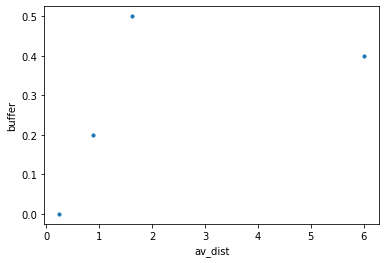

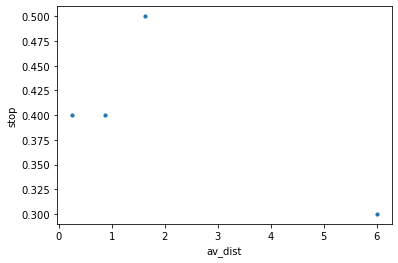

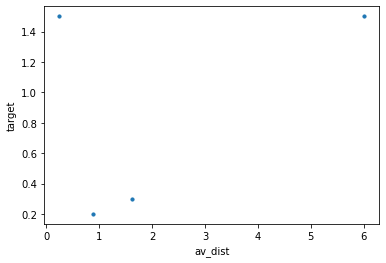

In [26]:
# LONGS
summarize_stats('stats_longs', [0, 0.5, 1.25, 2.0, 10], sort_by='kelly_adj_return')

# SHORTS
[< -- START](#START)


0 -> 0.25


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
41997,0 -> 0.25,0.0,0.25,2.9,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
63057,0 -> 0.25,0.0,0.25,3.9,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
23043,0 -> 0.25,0.0,0.25,2.0,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
54633,0 -> 0.25,0.0,0.25,3.5,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
37785,0 -> 0.25,0.0,0.25,2.7,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
65163,0 -> 0.25,0.0,0.25,4.0,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
25149,0 -> 0.25,0.0,0.25,2.1,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
27255,0 -> 0.25,0.0,0.25,2.2,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
20937,0 -> 0.25,0.0,0.25,1.9,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796
35679,0 -> 0.25,0.0,0.25,2.6,0.5,0.7,3.5,5.000,4.992,0.0,9,33.333,8.99,2.496,0.200,1.796





0.25 -> 1.0


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
78715,0.25 -> 1.0,0.25,1.0,1.6,0.2,0.4,1.5,3.750,3.750,0.0,22,50.000,30.25,3.750,0.367,11.092
85819,0.25 -> 1.0,0.25,1.0,1.9,0.4,0.6,2.1,3.500,3.437,0.0,32,46.875,35.19,3.033,0.314,11.057
87925,0.25 -> 1.0,0.25,1.0,2.0,0.4,0.6,2.1,3.500,3.437,0.0,32,46.875,35.19,3.033,0.314,11.057
83713,0.25 -> 1.0,0.25,1.0,1.8,0.4,0.6,2.1,3.500,3.437,0.0,32,46.875,35.19,3.033,0.314,11.057
72358,0.25 -> 1.0,0.25,1.0,1.3,0.2,0.3,1.5,5.000,4.922,0.0,21,42.857,32.81,3.692,0.312,10.252
76570,0.25 -> 1.0,0.25,1.0,1.5,0.2,0.3,1.5,5.000,4.922,0.0,21,42.857,32.81,3.692,0.312,10.252
74464,0.25 -> 1.0,0.25,1.0,1.4,0.2,0.3,1.5,5.000,4.922,0.0,21,42.857,32.81,3.692,0.312,10.252
78754,0.25 -> 1.0,0.25,1.0,1.6,0.2,0.5,1.5,3.000,3.000,0.0,22,54.545,26.00,3.600,0.394,10.242
90031,0.25 -> 1.0,0.25,1.0,2.1,0.4,0.6,2.1,3.500,3.441,0.0,33,45.455,34.19,2.867,0.296,10.121
100561,0.25 -> 1.0,0.25,1.0,2.6,0.4,0.6,2.1,3.500,3.441,0.0,33,45.455,34.19,2.867,0.296,10.121





1.0 -> 1.75


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return





1.75 -> 10


,distance_key,distance_min,distance_max,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return
255384,1.75 -> 10,1.75,10.0,3.8,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
244854,1.75 -> 10,1.75,10.0,3.3,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
253278,1.75 -> 10,1.75,10.0,3.7,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
251172,1.75 -> 10,1.75,10.0,3.6,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
249066,1.75 -> 10,1.75,10.0,3.5,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
240642,1.75 -> 10,1.75,10.0,3.1,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
259596,1.75 -> 10,1.75,10.0,4.0,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
242748,1.75 -> 10,1.75,10.0,3.2,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
257490,1.75 -> 10,1.75,10.0,3.9,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793
238536,1.75 -> 10,1.75,10.0,3.0,0.1,0.7,1.4,2.000,1.960,3.704,54,57.407,35.86,2.556,0.357,12.793


,av_dist,distance_key,buffer,stop,target,target_r,win_rate,profit_factor,total_return_r,kelly_adj_return,hit_count
0,0.125,0 -> 0.25,0.5,0.7,3.5,5.00,33.333,2.496,8.99,1.796,9
1,0.625,0.25 -> 1.0,0.2,0.4,1.5,3.75,50.000,3.750,30.25,11.092,22
2,-1.000,1.0 -> 1.75,-1.0,-1.0,-1.0,-1.00,-1.000,-1.000,0.00,0.000,0
3,5.875,1.75 -> 10,0.1,0.7,1.4,2.00,57.407,2.556,35.86,12.793,54



SUMMARY OF TOTALS:
kelly_adj_return_sum 25.680999999999997
total_return_r_sum 75.1
hit_count_sum 85



<AxesSubplot:xlabel='av_dist', ylabel='buffer'>

<AxesSubplot:xlabel='av_dist', ylabel='stop'>

<AxesSubplot:xlabel='av_dist', ylabel='target'>

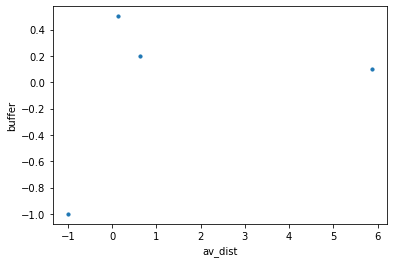

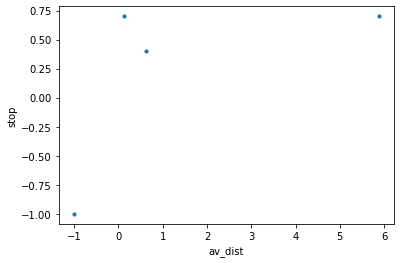

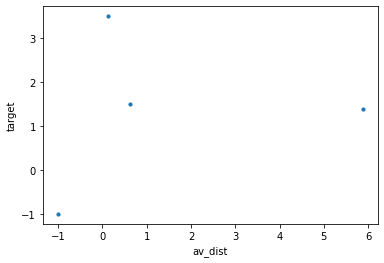

In [28]:
# SHORTS
summarize_stats('stats_shorts', [0, 0.25, 1.00, 1.75, 10], sort_by='kelly_adj_return')
# summarize_stats('stats_shorts', distance_points, sort_by='profit_factor')